# 1. Setup

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [32]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Data Exploration

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observation:**  
- `total_bedrooms` has 207 null values, which is approximately 1% of the data. So, we can just drop them.

In [34]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


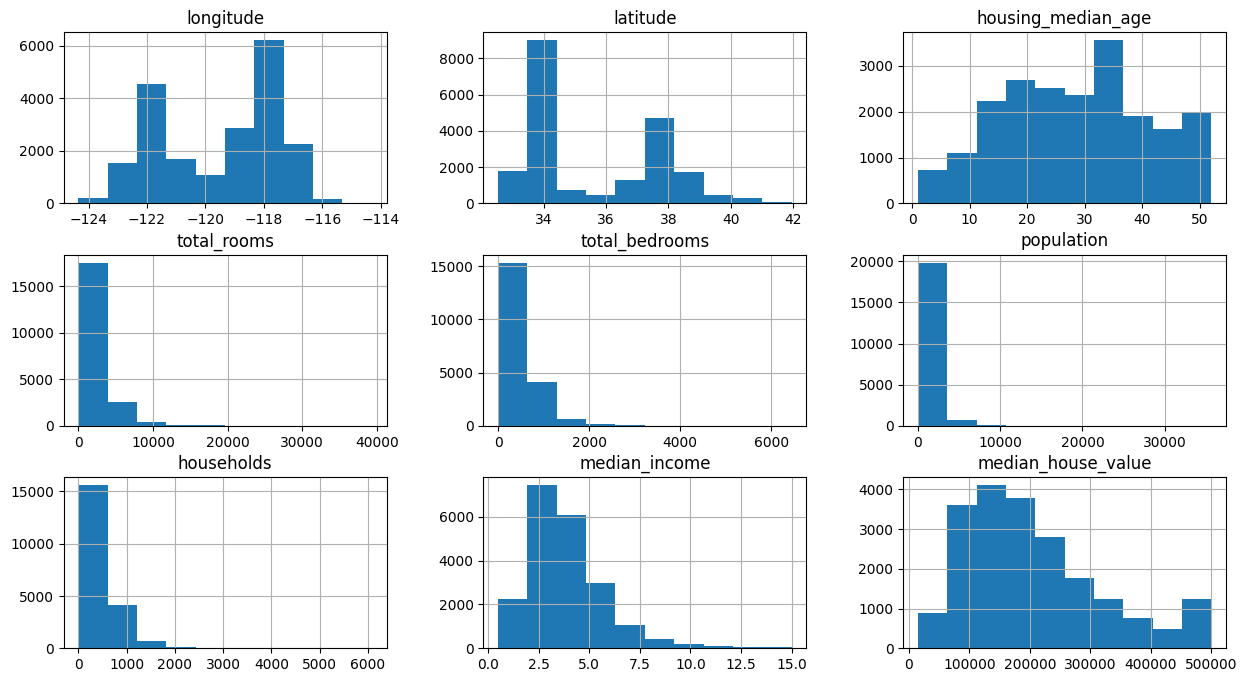

In [35]:
data.hist(figsize=(15,8))
data.dropna(inplace=True)

**Observation:**  
- Most histograms are right screwed

<Axes: >

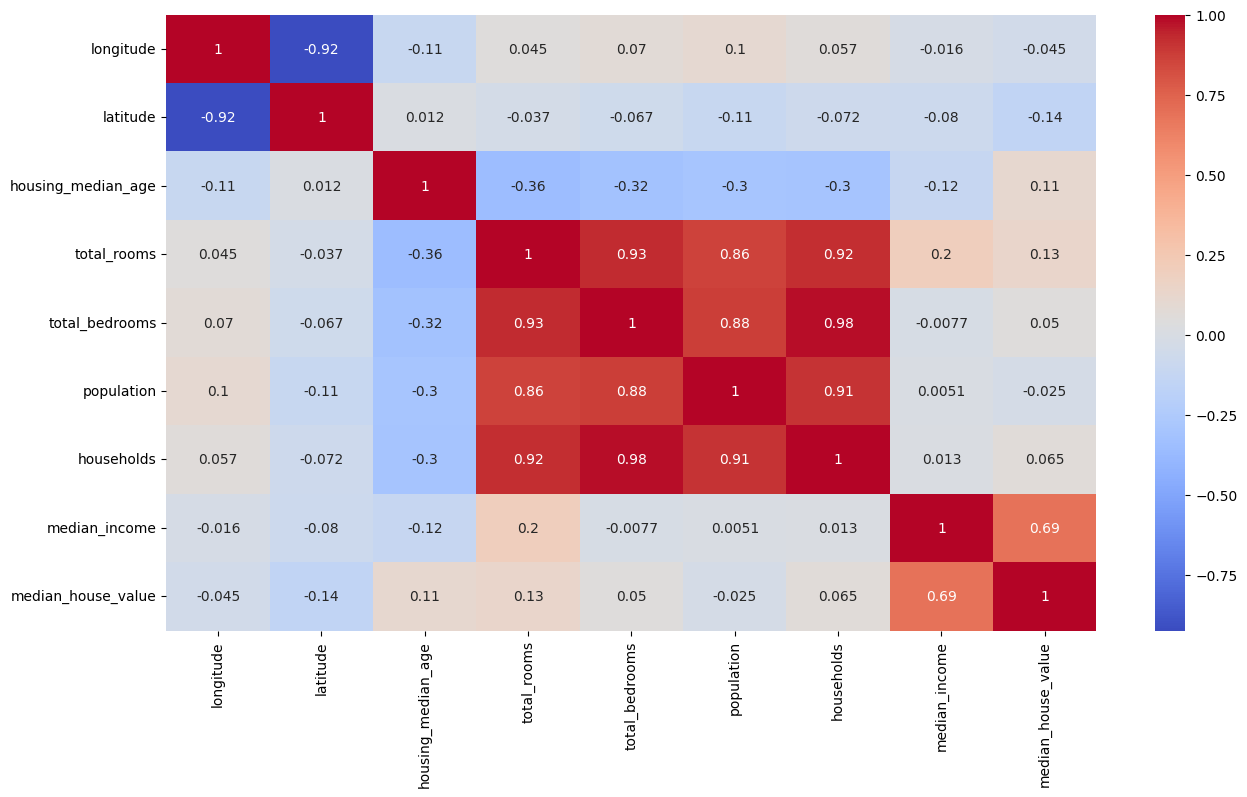

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')

**Observation:**  
- `median_income` and the target `median_house_value` have a strong correlation.

# 4. Data Preprocessing

In [37]:
# Train Test Validation split
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

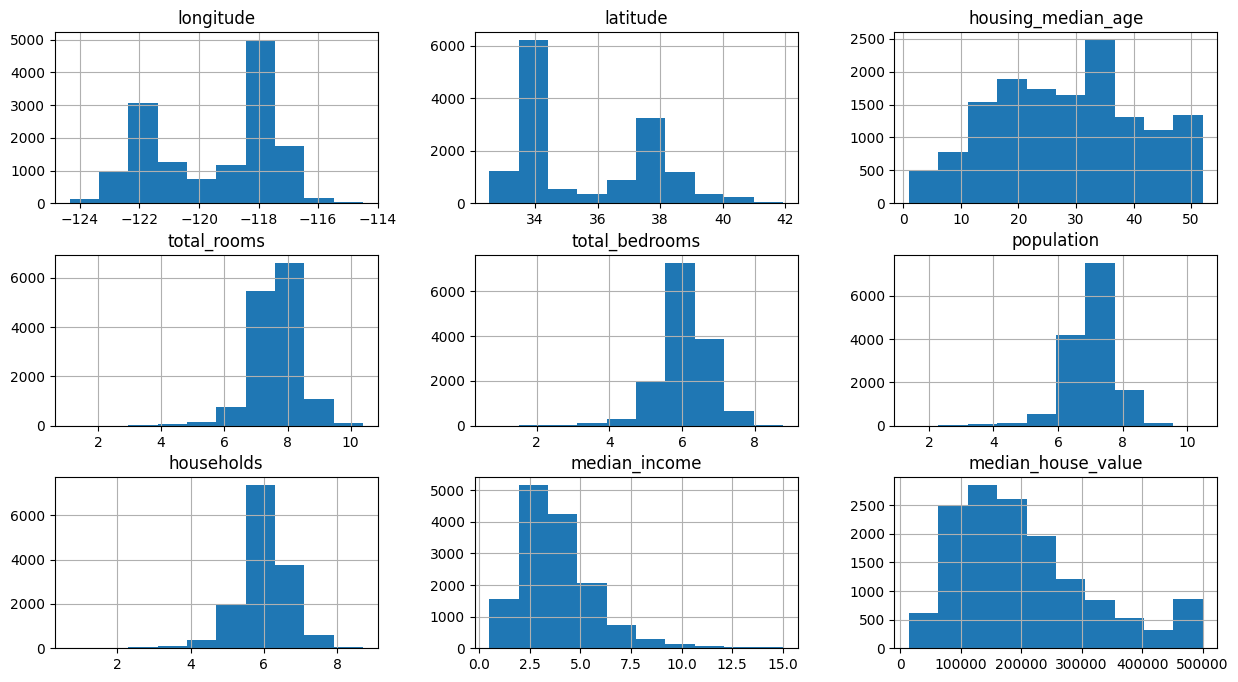

In [38]:
train_data = X_train.join(y_train)

# log normal tranformation for the right sckewed columns
train_data['total_rooms'] = np.log1p(train_data['total_rooms'])
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'])
train_data['population'] = np.log1p(train_data['population'])
train_data['households'] = np.log1p(train_data['households'])

train_data.hist(figsize=(15,8))

In [39]:
train_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6334
INLAND        4555
NEAR OCEAN    1852
NEAR BAY      1560
ISLAND           2
Name: count, dtype: int64

In [40]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))

train_data = train_data.drop('ocean_proximity', axis=1)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7824,-118.13,33.91,36.0,7.584773,5.758902,6.814543,5.726848,4.4948,190600.0,1,0,0,0,0
15444,-117.26,33.19,2.0,7.874739,6.234411,6.951772,6.259581,4.2361,158500.0,0,0,0,0,1
12222,-116.91,33.71,19.0,8.825854,7.060476,7.902487,6.962243,3.1591,189700.0,0,1,0,0,0
16065,-122.48,37.75,49.0,7.698029,6.011267,6.959399,6.006353,4.4375,329200.0,0,0,0,1,0
7874,-118.14,33.89,33.0,7.131699,5.624018,6.765039,5.594711,4.1708,175000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12129,-117.23,33.89,5.0,9.373819,7.616776,8.807921,7.555905,4.1953,136600.0,0,1,0,0,0
2313,-119.70,36.94,15.0,7.279319,5.627621,6.476972,5.583496,2.4861,86300.0,0,1,0,0,0
69,-122.29,37.81,46.0,7.938089,6.469250,7.508787,6.416732,0.9802,129200.0,0,0,0,1,0
4387,-118.26,34.08,46.0,6.852243,5.525453,6.814543,5.533389,3.5039,187500.0,1,0,0,0,0


<Axes: >

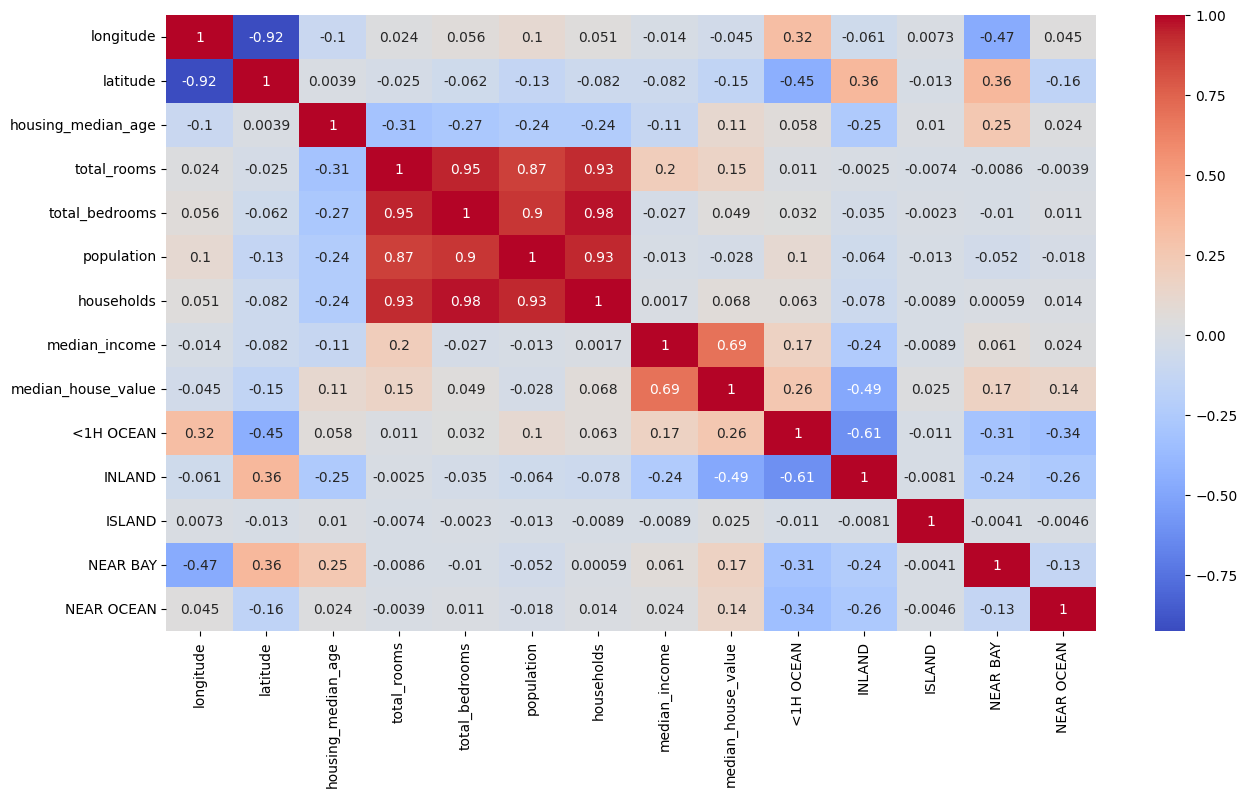

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

**Observation:**  
- Now we can see that `<1H Ocean` has high correlation and `inland` has negative correlation with `median_house_value`

<Axes: xlabel='latitude', ylabel='longitude'>

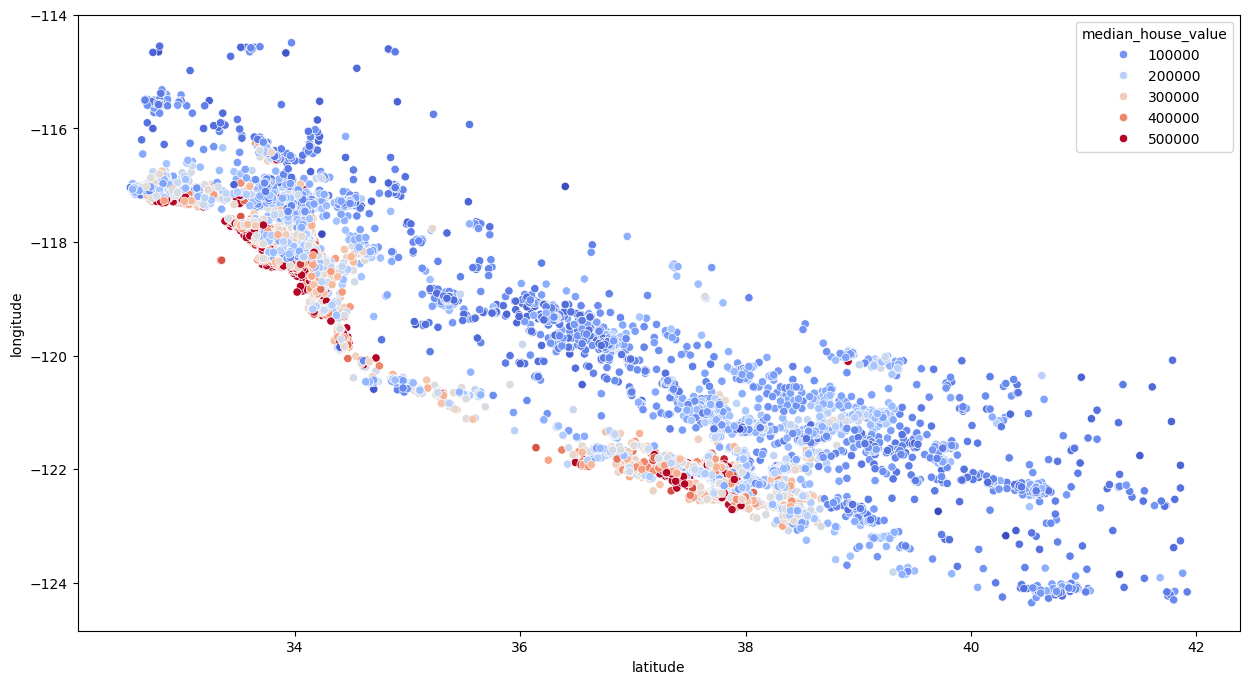

In [42]:
# Since we have the latitue and longitude lets visualize the the speadout
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

# 5.1 Feature Engineering

In [43]:
train_data['rooms_per_household'] = np.log1p(train_data['total_rooms']/train_data['households'])
train_data['bedroom_ratio'] = np.log1p(train_data['total_bedrooms']/train_data['total_rooms'])

In [44]:
train_data = train_data.drop("ISLAND", axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio
7824,-118.13,33.91,36.0,7.584773,5.758902,6.814543,5.726848,4.4948,190600.0,1,0,0,0,0.843472,0.564900
15444,-117.26,33.19,2.0,7.874739,6.234411,6.951772,6.259581,4.2361,158500.0,0,0,0,1,0.814493,0.583163
12222,-116.91,33.71,19.0,8.825854,7.060476,7.902487,6.962243,3.1591,189700.0,0,1,0,0,0.818755,0.587774
16065,-122.48,37.75,49.0,7.698029,6.011267,6.959399,6.006353,4.4375,329200.0,0,0,1,0,0.824898,0.577110
7874,-118.14,33.89,33.0,7.131699,5.624018,6.765039,5.594711,4.1708,175000.0,1,0,0,0,0.821858,0.581430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12129,-117.23,33.89,5.0,9.373819,7.616776,8.807921,7.555905,4.1953,136600.0,0,1,0,0,0.806742,0.594739
2313,-119.70,36.94,15.0,7.279319,5.627621,6.476972,5.583496,2.4861,86300.0,0,1,0,0,0.834525,0.572728
69,-122.29,37.81,46.0,7.938089,6.469250,7.508787,6.416732,0.9802,129200.0,0,0,1,0,0.805177,0.596065
4387,-118.26,34.08,46.0,6.852243,5.525453,6.814543,5.533389,3.5039,187500.0,1,0,0,0,0.805737,0.591320


# 6. Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



# Split the train data again
X_train = train_data.drop(['median_house_value'], axis = 1)
y_train = train_data['median_house_value']

X_train = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [46]:
test_data = X_test.join(y_test)

In [ ]:
from utils import preprocessing

test_data = preprocessing(test_data)

test_data = test_data.drop("ISLAND", axis=1)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio
7433,-118.21,33.94,40.0,7.708860,6.388561,7.716461,6.364751,2.4459,143800.0,1,0,0,0,0.793526,0.603622
17948,-121.96,37.34,42.0,7.601902,5.998937,6.849066,5.929589,4.4453,255400.0,1,0,0,0,0.825065,0.581733
918,-121.95,37.52,33.0,8.292799,6.639876,7.909122,6.638568,5.2308,196900.0,1,0,0,0,0.810568,0.588164
9531,-120.46,37.51,22.0,7.902857,6.210600,7.267525,5.991465,2.9000,83100.0,0,1,0,0,0.841144,0.579904
17091,-122.23,37.48,33.0,8.042056,6.692084,7.547502,6.576470,3.3015,267700.0,0,0,0,1,0.798792,0.605482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,-121.89,37.33,42.0,7.154615,5.883322,7.134891,5.831882,2.2583,192500.0,1,0,0,0,0.800570,0.600106
10765,-117.90,33.63,32.0,8.176673,6.257668,7.231287,6.287859,6.1426,450700.0,1,0,0,0,0.833079,0.568325
7539,-118.22,33.90,38.0,6.680855,5.075174,6.522093,5.123964,3.6607,110400.0,1,0,0,0,0.834579,0.565120
414,-122.28,37.89,52.0,7.869784,6.161207,6.990257,6.190315,4.1250,270900.0,0,0,1,0,0.820355,0.578238


In [ ]:
# Split the test data again
X_test = test_data.drop(['median_house_value'], axis = 1)
y_test = test_data['median_house_value']


X_test = scaler.transform(X_test)

In [64]:
reg.score(X_test, y_test)

c:\Users\rk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2175.276545158845

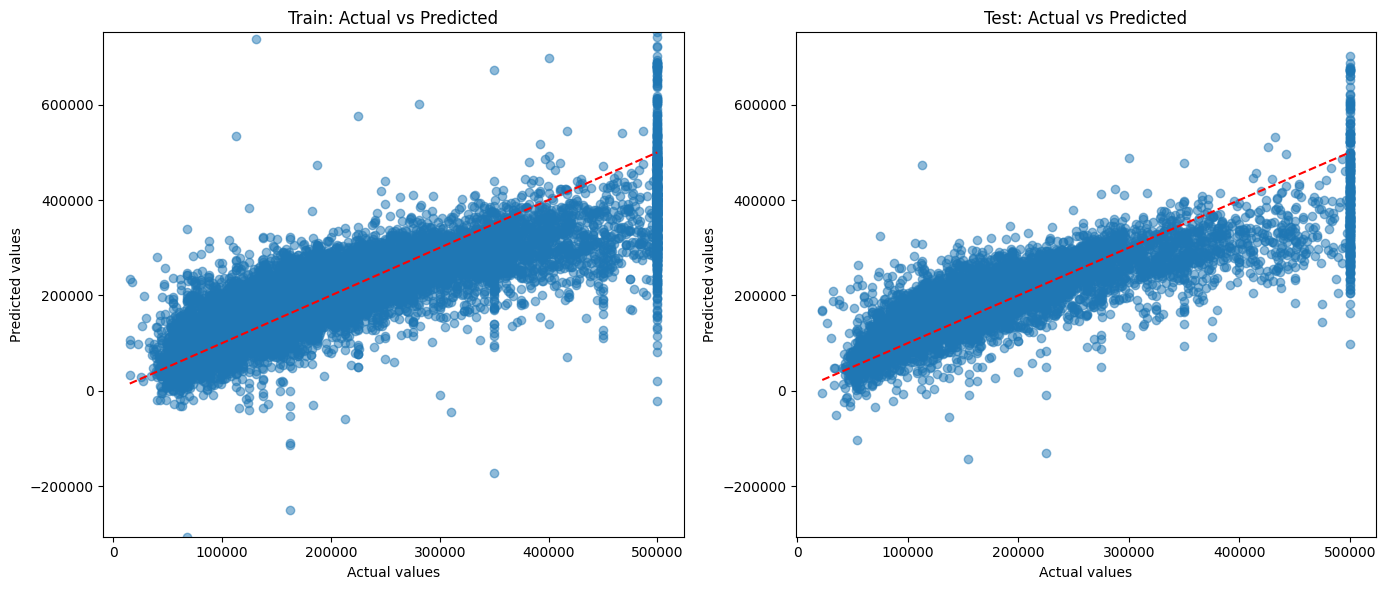

In [50]:
import matplotlib.pyplot as plt

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Train: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

plt.ylim(y_min, y_max)


# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

plt.ylim(y_min, y_max) 


plt.tight_layout()
plt.show()


# 7. Randomn Forest Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
forest.score(X_test, y_test)

0.809233240116636

## Hyperparameter Tuning

In [53]:
# from sklearn.model_selection import GridSearchCV

# forest = RandomForestRegressor()

# param_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_depth": [None, 4, 8],
#     "min_samples_split": [2, 4]
# }

# grid_search = GridSearchCV(forest, param_grid, cv=5,
#                            scoring="neg_mean_squared_error",
#                            return_train_score=True)

# grid_search.fit(X_train, y_train)

In [54]:
# grid_search.best_estimator_

In [55]:
# grid_search.best_estimator_.score(X_test, y_test)

# 8. Prediction using User Input

In [56]:
def preprocess_user_input(data):

    data['total_rooms'] = np.log1p(data['total_rooms'])
    data['total_bedrooms'] = np.log1p(data['total_bedrooms'])
    data['population'] = np.log1p(data['population'])
    data['households'] = np.log1p(data['households'])
 
    data = data.join(pd.get_dummies(data['ocean_proximity']).astype(int))

    expected_cols = ['<1H OCEAN', 'INLAND',
                     'NEAR BAY', 'NEAR OCEAN']

    for col in expected_cols:
        if col not in data.columns:
            data[col] = 0
    
    data = data.drop('ocean_proximity', axis=1)

    data['rooms_per_household'] = np.log1p(data['total_rooms'] / data['households'])
    data['bedroom_ratio'] = np.log1p(data['total_bedrooms'] / data['total_rooms'])

    return data   

In [57]:
def predict(housing_median_age, total_rooms, total_bedrooms,
            population, households, median_income,
            ocean_proximity='INLAND',
            longitude=36.5, latitude=-119.5,
            model=None):

    import pandas as pd
    input_data = pd.DataFrame([{
        "longitude": longitude,
        "latitude": latitude,
        "housing_median_age": housing_median_age,
        "total_rooms": total_rooms,
        "total_bedrooms": total_bedrooms,
        "population": population,
        "households": households,
        "median_income": median_income,
        "ocean_proximity": ocean_proximity
    }])

    processed_data = preprocess_user_input(input_data)

    prediction = model.predict(processed_data)

    return prediction[0]    

In [58]:
def get_user_inputs():
    print("Enter the following details (press Enter to use default values for latitude/longitude):")

    housing_median_age = float(input("Housing Median Age: "))
    total_rooms = float(input("Total Rooms: "))
    total_bedrooms = float(input("Total Bedrooms: "))
    population = float(input("Population: "))
    households = float(input("Households: "))
    median_income = float(input("Median Income: "))
    ocean_proximity = input("Ocean Proximity (<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND): ").strip().upper()
    if ocean_proximity == "ISLAND":
        ocean_proximity = "<1H OCEAN"

    longitude = input("Longitude (default = -119.5): ")
    latitude = input("Latitude (default = 36.5): ")
    longitude = float(longitude) if longitude else -119.5
    latitude = float(latitude) if latitude else 36.5

    return (
        housing_median_age, total_rooms,
        total_bedrooms, population, households,
        median_income, ocean_proximity, longitude, latitude
    )

In [59]:
user_inputs = get_user_inputs()
# user_inputs.to_numpy()

Enter the following details (press Enter to use default values for latitude/longitude):


In [60]:
prediction = predict(*user_inputs, model=forest)

print(f"\nPredicted House Value: ${prediction:.2f}")


Predicted House Value: $434518.67


c:\Users\rk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Save Model

In [65]:
import pickle
with open('cali_prediction_model.pickle','wb') as f:
    pickle.dump(forest,f)